# Latent experiments

## 1 - JSON results

In [1]:
run = 1
numberOfFolds = 10

# 12/12
discrete_data = [
        "hiv_test", 
        "hayes_roth",
        "balance_scale", 
        "somerville",
        "car_evaluation",
        "nursery", 
        "breast_cancer", 
        "web_phishing",
        "zoo",
        "vote", 
        "spect_heart",
        "alarm"
]

discrete_directory_path = "../../latent_results/run_" + str(run) + "/discrete/" 

# 12/12
continuous_data = [
        "real_state_valuation", 
        "buddymove", 
        "qsar_fish_toxicity", 
        "qsar_aqua_toxicity", 
        "ilpd",
        "alcohol",
        "travel_reviews",
        "wine_quality_white", 
        "wine", 
        "leaf", 
        "nba", 
        "wdbc", 
]

continuous_directory_path = "../../latent_results/run_" + str(run) + "/continuous/" 

# 12/12
mixed_data = [
        "haberman", 
        "iris", 
        "blood_transfusion", 
        "user_knowledge",
        "vertebral",
        "ecoli",
        "planning_relax", 
        "thoracic_surgery",
        "vehicle", 
         "thyroid",
        "parkinsons", 
        "ionosphere"
]

mixed_directory_path = "../../latent_results/run_" + str(run) + "/mixed/" 


dataset_groups = [discrete_data, continuous_data, mixed_data]
base_directories = [discrete_directory_path, continuous_directory_path, mixed_directory_path]

methods = [
    "HC",
    "KDE",
    "MSPN",
    "GLFM",
    "IL",
    "GLSL_EMPTY"
]

import json
import statistics as stats
import pandas as pd

df_ll_results = pd.DataFrame(columns=methods)
df_time_results = pd.DataFrame(columns=methods)

for i in range(0,3):
    
    data_group = dataset_groups[i]
    base_directory = base_directories[i]
    
    for dataName in data_group:

        ll_results = {"dataset": dataName}
        time_results = {"dataset": dataName}
#         print("\n" + dataName)
        
        for methodName in methods:
            directoryName = dataName + "/" + str(numberOfFolds) + "_folds/" + methodName + "/"
            jsonName = dataName + "_results_" + methodName + ".json"
            fullPath = base_directory + directoryName + jsonName
            test_ll = []
            learning_time = []
            with open(fullPath) as json_file:
                jsonData = json.load(json_file)
                foldsData = jsonData["folds"]
                for i in range(1,11):
                    test_ll.append(foldsData["fold_"+str(i)]["test_LL"])
                    learning_time.append(foldsData["fold_"+str(i)]["learning_time"])

                mean_ll = stats.mean(test_ll)
                std_ll = stats.stdev(test_ll)
                std_time = stats.stdev(learning_time)/1000
                mean_time = stats.mean(learning_time)/1000
                
                ll_results[methodName] = mean_ll
                time_results[methodName] = mean_time
                
        df_ll_results = df_ll_results.append(ll_results, ignore_index=True)
        df_time_results = df_time_results.append(time_results, ignore_index=True)

        
        
# Rename methods to be accord with the paper
renamed_methods = [
    "GS",
    "MKDE",
    "MSPN",
    "GLFM",
     "IL",
    "GLSL"
]
 

df_ll_results.rename(columns = {"KDE":"MKDE", "HC":"GS", "GLSL_EMPTY":"GLSL"}, inplace=True)
df_time_results.rename(columns = {"KDE":"MKDE", "HC":"GS", "GLSL_EMPTY":"GLSL"}, inplace=True)

df_time_results

,GS,MKDE,MSPN,GLFM,IL,GLSL,dataset
0,0.0577,0.007274,0.295364,8.568002,1.2214,12.9554,hiv_test
1,0.1980,0.003215,1.495560,6.054503,1.4531,108.3159,hayes_roth
2,0.3515,0.015685,5.279399,32.051218,3.5113,144.2143,balance_scale
3,1.5133,0.004974,1.461210,9.390009,4.6200,1361.0906,somerville
4,7.1743,0.085507,4.037613,178.143478,32.0888,6554.2567,car_evaluation
5,199.0461,3.002817,4.124643,1238.841204,800.3747,49516.8689,nursery
6,4.0083,0.660863,3.857398,31.064211,30.8645,1518.6931,breast_cancer
7,6.6571,0.095812,8.999188,183.098719,125.6551,7775.2793,web_phishing
8,2.1969,0.406173,4.290133,31.436786,49.3234,3160.1754,zoo
9,1.2928,0.013126,3.613516,30.756151,64.3128,2014.7178,vote


## 2 - Rank tables

### 2.1 - Log-likelihood

In [2]:
ll_rank_df = df_ll_results[renamed_methods].rank(method="max", axis = 1, ascending = 0)
ll_rank_df[renamed_methods].mean(axis = 0)

GS      3.694444
MKDE    3.194444
MSPN    4.361111
GLFM    5.472222
IL      2.500000
GLSL    1.777778
dtype: float64

In [3]:
ll_rank_df[renamed_methods].std(axis = 0)

GS      1.327069
MKDE    1.410561
MSPN    1.495761
GLFM    0.877858
IL      0.910259
GLSL    1.197882
dtype: float64

#### 2.1.1 - Rank matrix

In [4]:
ll_rank_df

,GS,MKDE,MSPN,GLFM,IL,GLSL
0,2.0,5.0,6.0,4.0,1.0,3.0
1,2.0,5.0,3.0,6.0,4.0,1.0
2,4.0,1.0,2.0,5.0,3.0,6.0
3,3.0,4.0,5.0,6.0,1.0,2.0
4,6.0,1.0,3.0,5.0,2.0,4.0
5,6.0,3.0,4.0,2.0,1.0,5.0
6,2.0,5.0,4.0,6.0,3.0,1.0
7,2.0,5.0,3.0,6.0,4.0,1.0
8,1.0,5.0,4.0,6.0,3.0,2.0
9,2.0,5.0,1.0,6.0,4.0,3.0


In [5]:
ll_rank_df = df_ll_results[renamed_methods].rank(method="max", axis = 1, ascending = 0)
ll_rank_df_cat = pd.DataFrame()
for col in ll_rank_df.columns:
    ll_rank_df_cat[col] = ll_rank_df[col].astype("int64")

for col in ll_rank_df_cat.columns:
    print(ll_rank_df_cat[col].value_counts())

4    17
2     7
5     5
6     3
3     2
1     2
Name: GS, dtype: int64
3    10
5     9
4     6
1     6
2     5
Name: MKDE, dtype: int64
5    12
6     9
4     5
3     5
2     3
1     2
Name: MSPN, dtype: int64
6    23
5     9
4     3
2     1
Name: GLFM, dtype: int64
3    16
2    10
1     6
4     4
Name: IL, dtype: int64
1    20
2    10
3     3
6     1
5     1
4     1
Name: GLSL, dtype: int64


### 2.2 - Learning time

In [6]:
time_rank_df = df_time_results[renamed_methods].rank(method="max", axis = 1, ascending = 1)
time_rank_df[renamed_methods].mean(axis = 0)

GS      2.222222
MKDE    1.000000
MSPN    3.138889
GLFM    4.527778
IL      4.111111
GLSL    6.000000
dtype: float64

In [7]:
time_rank_df[renamed_methods].std(axis = 0)

GS      0.421637
MKDE    0.000000
MSPN    0.723198
GLFM    0.774084
IL      0.747483
GLSL    0.000000
dtype: float64

#### 2.2.1 - Rank matrix

In [8]:
time_rank_df = df_time_results[renamed_methods].rank(method="max", axis = 1, ascending = 1)
time_rank_df_cat = pd.DataFrame()
for col in time_rank_df.columns:
    time_rank_df_cat[col] = time_rank_df[col].astype("int64")

for col in time_rank_df_cat.columns:
    print(time_rank_df_cat[col].value_counts())

2    28
3     8
Name: GS, dtype: int64
1    36
Name: MKDE, dtype: int64
3    20
4     9
2     6
5     1
Name: MSPN, dtype: int64
5    23
4    11
2     2
Name: GLFM, dtype: int64
4    16
5    12
3     8
Name: IL, dtype: int64
6    36
Name: GLSL, dtype: int64


## 3 - Friedman test

### 3.1 - Log-likelihood

In [9]:
from scipy.stats import friedmanchisquare as friedman_test

friedman_test(
              ll_rank_df["MKDE"], 
              ll_rank_df["MSPN"], 
              ll_rank_df["GLFM"], 
              ll_rank_df["IL"], 
              ll_rank_df["GS"], 
              ll_rank_df["GLSL"])

FriedmanchisquareResult(statistic=89.77777777777771, pvalue=7.481783911616922e-18)

### 3.2 - Learning time

In [10]:
from scipy.stats import friedmanchisquare as friedman_test

friedman_test(
              time_rank_df["MKDE"], 
              time_rank_df["MSPN"], 
              time_rank_df["GLFM"], 
              time_rank_df["IL"],
              time_rank_df["GS"],
              time_rank_df["GLSL"])

FriedmanchisquareResult(statistic=161.41269841269832, pvalue=4.948227870825097e-33)

## 4 - Nemenyi post-hoc analysis

### 4.1 - Log-likelihood

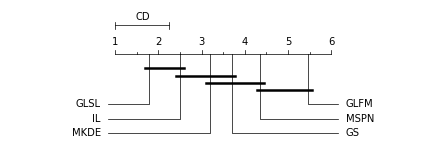

In [11]:
import Orange
import matplotlib.pyplot as plt

n_datasets = df_ll_results.shape[0]

mean_ranks = ll_rank_df[renamed_methods].mean(axis = 0)
cd = Orange.evaluation.compute_CD(mean_ranks, n_datasets) #tested on 36 datasets
Orange.evaluation.graph_ranks(mean_ranks, renamed_methods, cd=cd, width=6, textspace=1.5, filename="ll_nemenyi.svg")

### 4.2 - Learning time

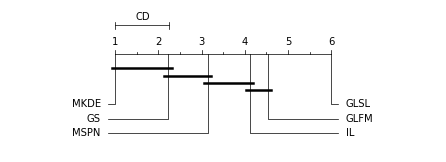

In [12]:
import Orange
import matplotlib.pyplot as plt

n_datasets = df_time_results.shape[0]

mean_ranks = time_rank_df[renamed_methods].mean(axis = 0)
cd = Orange.evaluation.compute_CD(mean_ranks, n_datasets) #tested on 36 datasets
Orange.evaluation.graph_ranks(mean_ranks, renamed_methods, cd=cd, width=6, textspace=1.5, filename="time_nemenyi.svg")